In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import sys
import glob
import pandas as pd
import os
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict
import pickle
from open_spiel.python.examples.ubc_nfsp_example import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [5]:
series = []
experiment_dir = '/shared/outputs/'
EXPERIMENT = 'auctions5'
for checkpoint_file in glob.glob(f'{experiment_dir}/{EXPERIMENT}/*/solving_checkpoints/checkpoint_latest.pkl'):
    with open(checkpoint_file, 'rb') as f:
        checkpoint = pickle.load(f)
        nash_conv_history = checkpoint['nash_conv_history']
        series.append({
            'name': checkpoint['name'],
            'data': nash_conv_history
        })
    

No handles with labels found to put in legend.


Text(0.5, 0, 'Time')

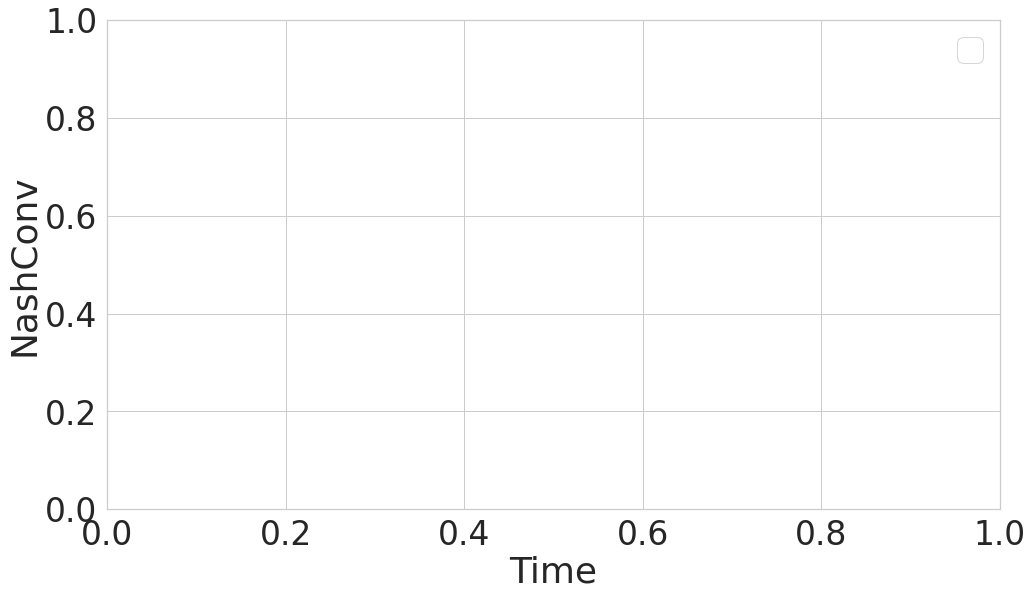

In [6]:
sns.set_theme(style="whitegrid", font_scale=3)
plt.figure(figsize=(16,9))
for s in series:
    x = [a[1] for a in s['data']]
    y = [a[2] for a in s['data']]
    plt.plot(x, y, label=s['name'], linewidth=3)
plt.legend()
plt.ylabel('NashConv')
plt.xlabel('Time')